<a href="https://colab.research.google.com/github/Watirboi/data_science/blob/main/SA_Traffic_Stop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Traffic Data in San Antonio, TX

## Importing the Libraries

In [86]:
import pandas as pd
# Suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

## Importing the Datasets

In [87]:
filename = 'tx_san_antonio_2020_04_01.csv'
names = ['date','time','location','substation','subject_age','subject_sex','violation','subject_race']
sa_traffic = pd.read_csv(filename, header=0, usecols=names)
sa_traffic = sa_traffic.reindex(columns=names)
sa_traffic.head()

,date,time,location,substation,subject_age,subject_sex,violation,subject_race
0,2015-04-03,20:35:00,31 RUE CHARLES,NORTH,24.000,male,FAILURE TO DISPLAY VALID REGISTRATION INSIGNIA...,white
1,2014-08-10,09:55:00,FRONTAGE RD 16,SOUTH,nan,male,5-11 UNLAWFULLY SELLING AN ANIMAL AT ANOUTDOOR...,unknown
2,2014-11-01,15:00:00,1900 DAKOTA,EAST,48.000,male,5-150 VIOLATING ANIMAL NUISANCE REQUIREMENTS,hispanic
3,2014-02-14,20:24:00,5439 ENCANTA,NORTH,40.000,female,5-100 FAILURE TO COMPLY WITH DOG AND CATLICENS...,white
4,2014-11-03,16:30:00,5530 HAVENCREST,SOUTH,44.000,male,5-125 VIOLATING RABIES VACCINATION REQUIREMENT,hispanic


In [85]:
sa_traffic.shape

(1040428, 8)

## Taking Care of missing data

In [4]:
# missing data counts
print(print(sa_traffic.isnull().sum()))

date                0
time                1
location            3
substation      79420
subject_age      1331
subject_sex      2796
violation           7
subject_race      266
dtype: int64
None


In [5]:
print(sa_traffic.dtypes)

date             object
time             object
location         object
substation       object
subject_age     float64
subject_sex      object
violation        object
subject_race     object
dtype: object


In [6]:
from sklearn.impute import SimpleImputer
# handle string date column
s_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='No Data') # string or object values
s_imputer.fit(sa_traffic.iloc[:, 0:1])
sa_traffic.iloc[:, 0:1] = s_imputer.transform(sa_traffic.iloc[:, 0:1])

# handle string time column
s_time_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='00:00:00')
s_time_imputer.fit(sa_traffic.iloc[:, 1:2]) 
sa_traffic.iloc[:, 1:2] = s_time_imputer.transform(sa_traffic.iloc[:, 1:2])

# handle string ['location','substation'] columns
s_imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='No Data')
s_imputer.fit(sa_traffic.iloc[:, 2:4]) 
sa_traffic.iloc[:, 2:4] = s_imputer.transform(sa_traffic.iloc[:, 2:4])

s_subject_age_imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # only numerical values
s_subject_age_imputer.fit(sa_traffic.iloc[:, 4:5]) 
sa_traffic.iloc[:, 4:5] = s_subject_age_imputer.transform(sa_traffic.iloc[:, 4:5])

s_imputer.fit(sa_traffic.iloc[:, 5:8])
sa_traffic.iloc[:, 5:8] = s_imputer.transform(sa_traffic.iloc[:, 5:8])

In [7]:
pd.to_datetime(sa_traffic['date'] + ' ' + sa_traffic['time'])

0         2015-04-03 20:35:00
1         2014-08-10 09:55:00
2         2014-11-01 15:00:00
3         2014-02-14 20:24:00
4         2014-11-03 16:30:00
                  ...        
1040423   2018-04-10 06:05:00
1040424   2018-04-10 06:12:00
1040425   2012-04-19 08:20:00
1040426   2012-04-24 13:51:00
1040427   2012-12-13 10:53:00
Length: 1040428, dtype: datetime64[ns]

In [8]:
# Verify no nulls remain
print(print(sa_traffic.isnull().sum()))

date            0
time            0
location        0
substation      0
subject_age     0
subject_sex     0
violation       0
subject_race    0
dtype: int64
None


## Dataset Evaluation

In [9]:
sa_traffic.head()

,date,time,location,substation,subject_age,subject_sex,violation,subject_race
0,2015-04-03,20:35:00,31 RUE CHARLES,NORTH,24.000,male,FAILURE TO DISPLAY VALID REGISTRATION INSIGNIA...,white
1,2014-08-10,09:55:00,FRONTAGE RD 16,SOUTH,35.782,male,5-11 UNLAWFULLY SELLING AN ANIMAL AT ANOUTDOOR...,unknown
2,2014-11-01,15:00:00,1900 DAKOTA,EAST,48.000,male,5-150 VIOLATING ANIMAL NUISANCE REQUIREMENTS,hispanic
3,2014-02-14,20:24:00,5439 ENCANTA,NORTH,40.000,female,5-100 FAILURE TO COMPLY WITH DOG AND CATLICENS...,white
4,2014-11-03,16:30:00,5530 HAVENCREST,SOUTH,44.000,male,5-125 VIOLATING RABIES VACCINATION REQUIREMENT,hispanic


In [10]:
sa_traffic.dtypes

date             object
time             object
location         object
substation       object
subject_age     float64
subject_sex      object
violation        object
subject_race     object
dtype: object

In [11]:
# 8 characters from the end to 6 characters from the end
# this is quite a chore
sa_traffic.time.str.slice(-8, -6).astype(int).head()

0    20
1     9
2    15
3    20
4    16
Name: time, dtype: int64

In [12]:
# we will convert the Time column to datatime format
# there are many options to ensure this works well with your data
sa_traffic['time'] = pd.to_datetime(sa_traffic.time)
sa_traffic.head()

,date,time,location,substation,subject_age,subject_sex,violation,subject_race
0,2015-04-03,2021-01-04 20:35:00,31 RUE CHARLES,NORTH,24.000,male,FAILURE TO DISPLAY VALID REGISTRATION INSIGNIA...,white
1,2014-08-10,2021-01-04 09:55:00,FRONTAGE RD 16,SOUTH,35.782,male,5-11 UNLAWFULLY SELLING AN ANIMAL AT ANOUTDOOR...,unknown
2,2014-11-01,2021-01-04 15:00:00,1900 DAKOTA,EAST,48.000,male,5-150 VIOLATING ANIMAL NUISANCE REQUIREMENTS,hispanic
3,2014-02-14,2021-01-04 20:24:00,5439 ENCANTA,NORTH,40.000,female,5-100 FAILURE TO COMPLY WITH DOG AND CATLICENS...,white
4,2014-11-03,2021-01-04 16:30:00,5530 HAVENCREST,SOUTH,44.000,male,5-125 VIOLATING RABIES VACCINATION REQUIREMENT,hispanic


In [13]:
sa_traffic.dtypes

date                    object
time            datetime64[ns]
location                object
substation              object
subject_age            float64
subject_sex             object
violation               object
subject_race            object
dtype: object

In [14]:
sa_traffic.time.dt.hour.head()

0    20
1     9
2    15
3    20
4    16
Name: time, dtype: int64

In [15]:
sa_traffic.time.dt.weekday.head()

0    0
1    0
2    0
3    0
4    0
Name: time, dtype: int64

In [16]:
sa_traffic.time.dt.dayofyear.head()

0    4
1    4
2    4
3    4
4    4
Name: time, dtype: int64

## Timestamps

In [17]:
ts = pd.to_datetime('1/1/2012')

In [18]:
sa_traffic.loc[sa_traffic.time >= ts, :].head()

,date,time,location,substation,subject_age,subject_sex,violation,subject_race
0,2015-04-03,2021-01-04 20:35:00,31 RUE CHARLES,NORTH,24.000,male,FAILURE TO DISPLAY VALID REGISTRATION INSIGNIA...,white
1,2014-08-10,2021-01-04 09:55:00,FRONTAGE RD 16,SOUTH,35.782,male,5-11 UNLAWFULLY SELLING AN ANIMAL AT ANOUTDOOR...,unknown
2,2014-11-01,2021-01-04 15:00:00,1900 DAKOTA,EAST,48.000,male,5-150 VIOLATING ANIMAL NUISANCE REQUIREMENTS,hispanic
3,2014-02-14,2021-01-04 20:24:00,5439 ENCANTA,NORTH,40.000,female,5-100 FAILURE TO COMPLY WITH DOG AND CATLICENS...,white
4,2014-11-03,2021-01-04 16:30:00,5530 HAVENCREST,SOUTH,44.000,male,5-125 VIOLATING RABIES VACCINATION REQUIREMENT,hispanic


In [19]:
sa_traffic.time.max()

Timestamp('2021-01-04 23:59:00')

In [20]:
sa_traffic.time.max() - sa_traffic.time.min()

Timedelta('0 days 23:59:00')

In [21]:
(sa_traffic.time.max() - sa_traffic.time.min())

Timedelta('0 days 23:59:00')

## Plotting

In [22]:
%matplotlib inline

In [23]:
sa_traffic.head()

,date,time,location,substation,subject_age,subject_sex,violation,subject_race
0,2015-04-03,2021-01-04 20:35:00,31 RUE CHARLES,NORTH,24.000,male,FAILURE TO DISPLAY VALID REGISTRATION INSIGNIA...,white
1,2014-08-10,2021-01-04 09:55:00,FRONTAGE RD 16,SOUTH,35.782,male,5-11 UNLAWFULLY SELLING AN ANIMAL AT ANOUTDOOR...,unknown
2,2014-11-01,2021-01-04 15:00:00,1900 DAKOTA,EAST,48.000,male,5-150 VIOLATING ANIMAL NUISANCE REQUIREMENTS,hispanic
3,2014-02-14,2021-01-04 20:24:00,5439 ENCANTA,NORTH,40.000,female,5-100 FAILURE TO COMPLY WITH DOG AND CATLICENS...,white
4,2014-11-03,2021-01-04 16:30:00,5530 HAVENCREST,SOUTH,44.000,male,5-125 VIOLATING RABIES VACCINATION REQUIREMENT,hispanic


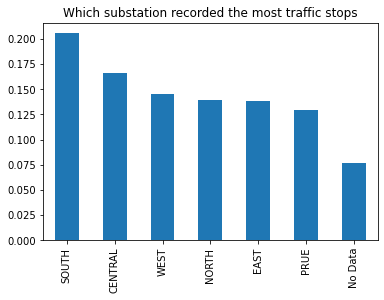

In [24]:
subStation_vals = sa_traffic.substation.value_counts() # Provide a pandas series of the count of substations

# The chart should display the proportion of substations in the subStation_vals

(subStation_vals/sa_traffic.shape[0]).plot(kind="bar");
plt.title("Which substation recorded the most traffic stops");

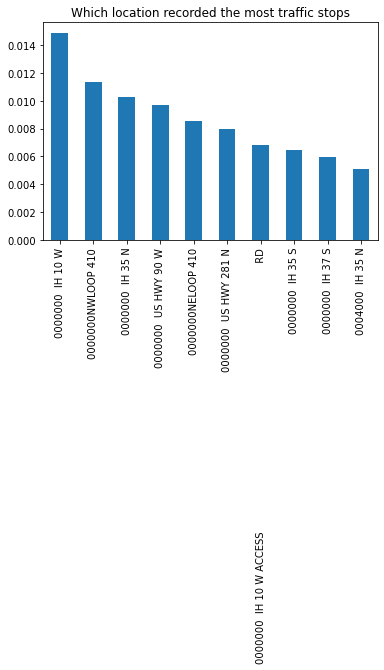

In [25]:
location_vals = sa_traffic.location.value_counts() # Provide a pandas series of the count of locations

# The chart should display the proportion of the top 10 locations in the location_vals

(location_vals[:10]/sa_traffic.shape[0]).plot(kind="bar");
plt.title("Which location recorded the most traffic stops");

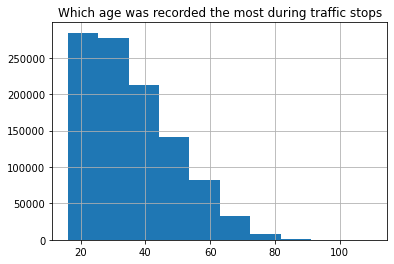

In [26]:
# The chart should display the proportion of age issued a violation

sa_traffic['subject_age'].hist();
plt.title("Which age was recorded the most during traffic stops");

In [27]:
sa_traffic['subject_age'].mode()

0   23.000
dtype: float64

In [28]:
sa_traffic['subject_age'].median()

33.0

In [29]:
sa_traffic['subject_age'].mean()

35.78210407690515

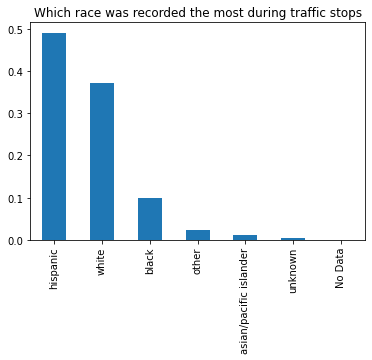

In [30]:
#sa_traffic.subject_race.value_counts().plot()

race_vals = sa_traffic.subject_race.value_counts() # Provide a pandas series of the count of respective races

# The chart should display the proportion of the top 10 races in the race_vals

(race_vals[:10]/sa_traffic.shape[0]).plot(kind="bar");
plt.title("Which race was recorded the most during traffic stops");

In [81]:
sa_traffic[(sa_traffic["subject_race"] == "hispanic") & (sa_traffic["subject_sex"] == "male")].count()

date            316772
time            316772
location        316772
substation      316772
subject_age     316772
subject_sex     316772
violation       316772
subject_race    316772
dtype: int64

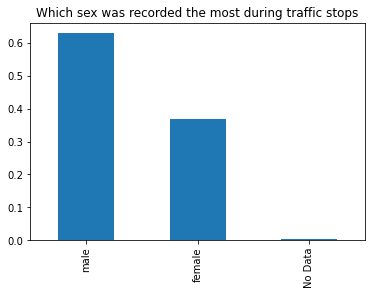

In [82]:
gender_vals = sa_traffic.subject_sex.value_counts() # Provide a pandas series of the count of respective gender

# The chart should display the proportion of the gender in the gender_vals

(gender_vals[:10]/sa_traffic.shape[0]).plot(kind="bar");
plt.title("Which sex was recorded the most during traffic stops");

In [33]:
gender_vals = sa_traffic.subject_sex.value_counts() # Provide a pandas series of the count of respective gender

# The chart should display the proportion of the gender in the gender_vals

gender_vals/sa_traffic.shape[0] - sum(sa_traffic.subject_sex.isnull())

male      0.629
female    0.368
No Data   0.003
Name: subject_sex, dtype: float64

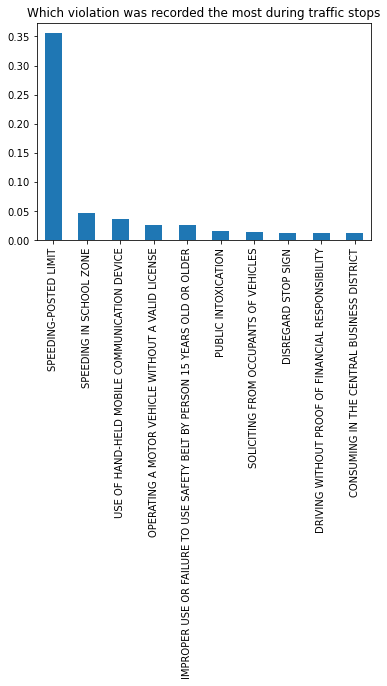

In [34]:
#sa_traffic.violation.value_counts().sort_index().plot()

violation_vals = sa_traffic.violation.value_counts() # Provide a pandas series of the count of respective violations

# The chart should display the proportion of the top 10 violations in the violation_vals

(violation_vals[:10]/sa_traffic.shape[0]).plot(kind="bar");
plt.title("Which violation was recorded the most during traffic stops");

In [35]:
# Get Continuous variables
sa_traffic.describe()

,subject_age
count,1040428.000
mean,35.782
std,13.415
min,16.000
25%,25.000
50%,33.000
75%,45.000
max,110.000


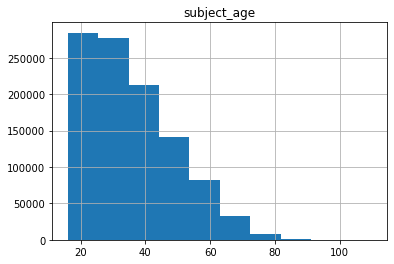

In [36]:
sa_traffic.hist();

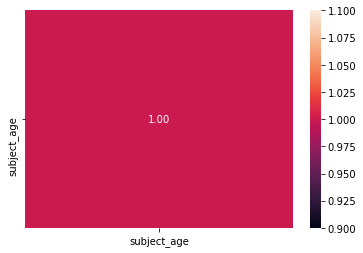

In [37]:
sns.heatmap(sa_traffic.corr(), annot=True, fmt='.2f');

In [38]:
sa_traffic.columns

Index(['date', 'time', 'location', 'substation', 'subject_age', 'subject_sex',
       'violation', 'subject_race'],
      dtype='object')

In [39]:
sa_traffic.tail()

,date,time,location,substation,subject_age,subject_sex,violation,subject_race
1040423,2018-04-10,2021-01-04 06:05:00,0000100N LOOP 1604 E WB AC,PRUE,51.000,male,SPEEDING-POSTED LIMIT,white
1040424,2018-04-10,2021-01-04 06:12:00,0000100N LOOP 1604 E WB AC,PRUE,51.000,male,SPEEDING-POSTED LIMIT,white
1040425,2012-04-19,2021-01-04 08:20:00,0000000 MAIN CIR,No Data,39.000,male,DISREGARD STOP SIGN|DRIVING WITHOUT PROOF OF F...,black
1040426,2012-04-24,2021-01-04 13:51:00,0000500 BUTTON WILLOW CV,NORTH,30.000,male,SPEEDING-POSTED LIMIT,white
1040427,2012-12-13,2021-01-04 10:53:00,0000000 96TH ...,SOUTH,24.000,male,DISREGARD RED LIGHT|DISREGARD STOP SIGN,asian/pacific islander


In [40]:
#labelencoder_X = LabelEncoder()
#labelencoder_X.fit_transform(sa_traffic['subject_sex'])


In [41]:
sa_traffic.tail()

,date,time,location,substation,subject_age,subject_sex,violation,subject_race
1040423,2018-04-10,2021-01-04 06:05:00,0000100N LOOP 1604 E WB AC,PRUE,51.000,male,SPEEDING-POSTED LIMIT,white
1040424,2018-04-10,2021-01-04 06:12:00,0000100N LOOP 1604 E WB AC,PRUE,51.000,male,SPEEDING-POSTED LIMIT,white
1040425,2012-04-19,2021-01-04 08:20:00,0000000 MAIN CIR,No Data,39.000,male,DISREGARD STOP SIGN|DRIVING WITHOUT PROOF OF F...,black
1040426,2012-04-24,2021-01-04 13:51:00,0000500 BUTTON WILLOW CV,NORTH,30.000,male,SPEEDING-POSTED LIMIT,white
1040427,2012-12-13,2021-01-04 10:53:00,0000000 96TH ...,SOUTH,24.000,male,DISREGARD RED LIGHT|DISREGARD STOP SIGN,asian/pacific islander


In [64]:
#sa_traffic.groupby("subject_race").size()
sa_traffic["subject_race"].value_counts()

hispanic                  511917
white                     387629
black                     103135
other                      23996
asian/pacific islander     10507
unknown                     2978
No Data                      266
Name: subject_race, dtype: int64

In [90]:
sa_traffic.date.min()

'2012-01-01'